<a href="https://colab.research.google.com/github/ahalyasanjiv/ChildhoodLeadExposure/blob/regression-tree/TreeRegression_ChildhoodLeadLevels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree Regression Model of Childhood Lead Levels

We want to learn to predict whether a given student will have high levels of exposure to lead. We can measure the different potential factors, like racial and socioeconomic factors to see how likely a given child is to be exposed to lead.


In [0]:
import pandas as pd
import numpy as np


# Imports for Tree Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Imports for Tree Visualizations
!pip install -q pydot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/NYS_Lead_Demographics_and_Housing_Data.csv?fbclid=IwAR1wf9Y8rv6ucPlYuS3DGUhNpmStHDZ713lA5A-Xw-Y0DEEeY5NdB1jGxnU')
df['Elevated Lead Cases'] = np.where(df['Percent Elevated Lead Cases']> 0, 'true', 'false')
df.head()


,Unnamed: 0,Percent Elevated Lead Cases,One race - White,One race - Black or African American,One race - American Indian and Alaska Native,One race - Asian,One race - Native Hawaiian and Other Pacific Islander,One race - Some other race,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Median Income,Population for whom poverty status is determined - Below 100 percent of the poverty level,Total Housing Units,% of housing units built 1950 - 1959,% built 1940 - 1949,% built 1939 or earlier,% of housing units built before 1950,Elevated Lead Cases
0,10013,0.0,53.9,4.5,0.1,35.0,0.0,1.9,4.6,6.1,50.5,51907,11.7,14178,3.4,2.5,60.0,62.5,false
1,10501,0.0,92.3,1.2,0.0,0.4,0.0,3.2,2.9,8.7,87.4,50972,0.6,415,12.3,7.0,8.2,15.2,false
2,10502,0.0,75.1,1.6,0.2,16.9,0.0,3.4,2.8,7.7,70.8,71563,2.5,2008,33.9,7.7,17.5,25.2,false
3,10505,0.0,83.0,2.0,0.0,15.0,0.0,0.0,0.0,9.3,74.5,29286,2.3,297,3.4,0.0,0.0,0.0,false
4,10506,0.0,95.1,0.2,0.1,3.5,0.0,0.2,1.0,2.2,93.3,82682,3.4,2331,13.7,2.1,18.9,21.0,false


In [34]:
features = [
    'Median Income', 
    'One race - Black or African American',
    'White alone, not Hispanic or Latino',
    '% of housing units built before 1950',
    'Population for whom poverty status is determined - Below 100 percent of the poverty level'
]

dtree=DecisionTreeClassifier(
    criterion='entropy', 
    random_state=20181105, 
    max_depth=5,
    min_samples_split=2, 
    #min_samples_leaf=1, 
    #max_features=None, 
    #max_leaf_nodes=None, 
)
dtree.fit(df[features], df['Elevated Lead Cases'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20181105, splitter='best')

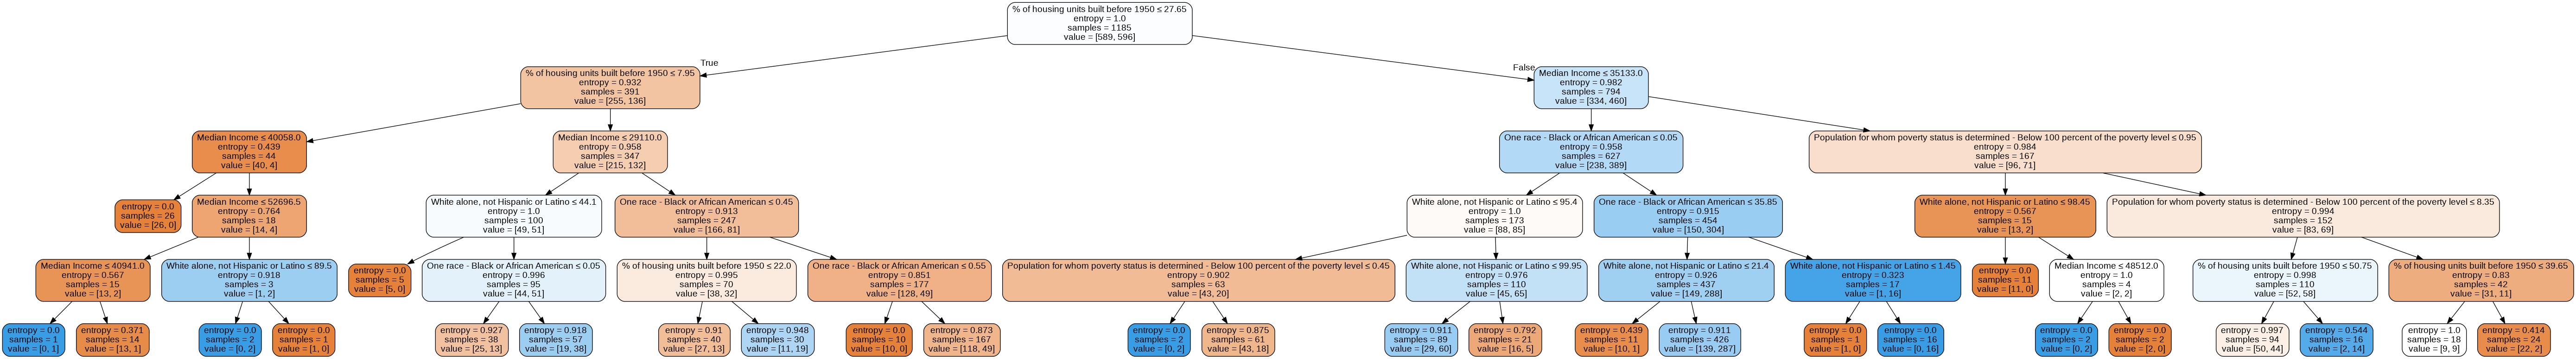

In [35]:
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                feature_names=features,
                special_characters=True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())